In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4e991994-5982-4622-9f25-48fb372f2efb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

    #NOTE:
    # I needed to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in Anaconda Prompt because I ran into some issue with the limit of size allowed to pull the data
    # Also need to copy local host URl to fix error that didn't allow me to pull data

{'status': {'timestamp': '2024-10-07T17:33:58.432Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9848}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11758, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [5]:
import pandas as pd

#This allows you to see all the columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [7]:
# This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11758,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976444e+07,1.976444e+07,False,NaN,1,NaN,NaN,None,2024-10-07T17:32:00.000Z,63580.607098,2.981346e+10,116.6876,-0.042595,1.422007,0.159086,16.885874,6.517824,10.369249,1.256635e+12,56.7187,1.335193e+12,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
1,1027,Ethereum,ETH,ethereum,9381,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203791e+08,1.203791e+08,True,NaN,2,NaN,NaN,None,2024-10-07T17:31:00.000Z,2470.247901,1.533647e+10,86.5574,0.133154,1.194453,-4.931397,7.918560,-4.790966,-19.525177,2.973663e+11,13.4218,2.973663e+11,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
2,825,Tether USDt,USDT,tether,99697,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196773e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-07T17:31:00.000Z,0.999886,5.523768e+10,84.8205,-0.002592,0.002420,-0.006679,-0.016214,-0.072783,-0.033101,1.196636e+11,5.4011,1.213588e+11,None,2024-10-07T17:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-07 13:34:11.333781
3,1839,BNB,BNB,bnb,2254,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459323e+08,1.459323e+08,False,NaN,4,NaN,NaN,None,2024-10-07T17:31:00.000Z,576.104665,1.658816e+09,19.6448,0.211377,1.610003,0.880479,16.327853,13.506757,11.158451,8.407230e+10,3.7945,8.407230e+10,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.692668e+08,5.861306e+08,True,NaN,5,NaN,NaN,None,2024-10-07T17:31:00.000Z,148.823294,2.349357e+09,115.1783,0.375000,2.257911,-3.918351,16.739827,-5.676655,4.478371,6.983782e+10,3.1529,8.722989e+10,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
5,3408,USDC,USDC,usd-coin,22321,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.540188e+10,3.540188e+10,False,NaN,6,NaN,NaN,None,2024-10-07T17:31:00.000Z,1.000054,5.684022e+09,136.3213,0.007253,0.011607,0.004146,-0.004972,0.030264,-0.003931,3.540378e+10,1.5980,3.540378e+10,None,2024-10-07T17:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-07 13:34:11.333781
6,52,XRP,XRP,xrp,1401,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-07T17:32:00.000Z,0.543311,1.084543e+09,76.5679,0.336638,1.619593,-12.294445,2.598622,-12.139350,25.147797,3.073186e+10,1.3882,5.433109e+10,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
7,74,Dogecoin,DOGE,dogecoin,1077,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462698e+11,1.462698e+11,True,NaN,8,NaN,NaN,None,2024-10-07T17:32:00.000Z,0.112199,7.290610e+08,71.8127,-0.332167,0.723594,-4.437337,18.619188,8.234683,4.288857,1.641131e+10,0.7409,1.641131e+10,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
8,1958,TRON,TRX,tron,1044,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.657787e+10,8.657790

In [9]:

def api_runner():
    global df # *****needed to be added so it know df is global variable so it could run properly
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Original Sandbox Environment was: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '4e991994-5982-4622-9f25-48fb372f2efb',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    #NOTE:
    # I needed to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in Anaconda Prompt because I ran into some issue with the limit of size allowed to pull the data
    # Also need to copy local host URl to fix error that didn't allow me to pull data

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df = df2.append(df2) ---- *****had to comment out add place the last two lines because, frame.append is deprecated; new format is panda.concat, took hours to figure out
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

In [11]:
# Gives ability to track the time and able tot run through and call the function in certain intervals that I want
import os
from time import time
from time import sleep

#API only allow 333 calls per day 
#letting it know this is our max
for i in range(333): 
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for 1 minute (basically wait for 60 sec and run again)
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11758,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976444e+07,1.976444e+07,False,NaN,1,NaN,NaN,None,2024-10-07T17:32:00.000Z,63580.607098,2.981346e+10,116.6876,-0.042595,1.422007,0.159086,16.885874,6.517824,10.369249,1.256635e+12,56.7187,1.335193e+12,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
1,1027,Ethereum,ETH,ethereum,9381,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203791e+08,1.203791e+08,True,NaN,2,NaN,NaN,None,2024-10-07T17:31:00.000Z,2470.247901,1.533647e+10,86.5574,0.133154,1.194453,-4.931397,7.918560,-4.790966,-19.525177,2.973663e+11,13.4218,2.973663e+11,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
2,825,Tether USDt,USDT,tether,99697,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196773e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-07T17:31:00.000Z,0.999886,5.523768e+10,84.8205,-0.002592,0.002420,-0.006679,-0.016214,-0.072783,-0.033101,1.196636e+11,5.4011,1.213588e+11,None,2024-10-07T17:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-07 13:34:11.333781
3,1839,BNB,BNB,bnb,2254,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459323e+08,1.459323e+08,False,NaN,4,NaN,NaN,None,2024-10-07T17:31:00.000Z,576.104665,1.658816e+09,19.6448,0.211377,1.610003,0.880479,16.327853,13.506757,11.158451,8.407230e+10,3.7945,8.407230e+10,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.692668e+08,5.861306e+08,True,NaN,5,NaN,NaN,None,2024-10-07T17:31:00.000Z,148.823294,2.349357e+09,115.1783,0.375000,2.257911,-3.918351,16.739827,-5.676655,4.478371,6.983782e+10,3.1529,8.722989e+10,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
5,3408,USDC,USDC,usd-coin,22321,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.540188e+10,3.540188e+10,False,NaN,6,NaN,NaN,None,2024-10-07T17:31:00.000Z,1.000054,5.684022e+09,136.3213,0.007253,0.011607,0.004146,-0.004972,0.030264,-0.003931,3.540378e+10,1.5980,3.540378e+10,None,2024-10-07T17:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-07 13:34:11.333781
6,52,XRP,XRP,xrp,1401,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-07T17:32:00.000Z,0.543311,1.084543e+09,76.5679,0.336638,1.619593,-12.294445,2.598622,-12.139350,25.147797,3.073186e+10,1.3882,5.433109e+10,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
7,74,Dogecoin,DOGE,dogecoin,1077,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462698e+11,1.462698e+11,True,NaN,8,NaN,NaN,None,2024-10-07T17:32:00.000Z,0.112199,7.290610e+08,71.8127,-0.332167,0.723594,-4.437337,18.619188,8.234683,4.288857,1.641131e+10,0.7409,1.641131e+10,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
8,1958,TRON,TRX,tron,1044,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.657787e+10,8.657790

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11758,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19764437.00000,19764437.00000,False,NaN,1,NaN,NaN,None,2024-10-07T17:32:00.000Z,63580.60710,29813457728.96569,116.68760,-0.04259,1.42201,0.15909,16.88587,6.51782,10.36925,1256634903401.19263,56.71870,1335192749048.45996,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
1,1027,Ethereum,ETH,ethereum,9381,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120379113.24004,120379113.24004,True,NaN,2,NaN,NaN,None,2024-10-07T17:31:00.000Z,2470.24790,15336468479.51661,86.55740,0.13315,1.19445,-4.93140,7.91856,-4.79097,-19.52518,297366251787.34174,13.42180,297366251787.34003,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
2,825,Tether USDt,USDT,tether,99697,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119677344810.50925,121372645785.79736,True,NaN,3,NaN,NaN,None,2024-10-07T17:31:00.000Z,0.99989,55237679482.69763,84.82050,-0.00259,0.00242,-0.00668,-0.01621,-0.07278,-0.03310,119663647394.79239,5.40110,121358754338.02000,None,2024-10-07T17:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-07 13:34:11.333781
3,1839,BNB,BNB,bnb,2254,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932340.92041,145932340.92041,False,NaN,4,NaN,NaN,None,2024-10-07T17:31:00.000Z,576.10467,1658815988.45809,19.64480,0.21138,1.61000,0.88048,16.32785,13.50676,11.15845,84072302411.74921,3.79450,84072302411.75000,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469266750.11680,586130614.02265,True,NaN,5,NaN,NaN,None,2024-10-07T17:31:00.000Z,148.82329,2349357272.78003,115.17830,0.37500,2.25791,-3.91835,16.73983,-5.67665,4.47837,69837823455.36505,3.15290,87229888616.03999,None,2024-10-07T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
5,3408,USDC,USDC,usd-coin,22321,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35401883947.74037,35401883947.74037,False,NaN,6,NaN,NaN,None,2024-10-07T17:31:00.000Z,1.00005,5684022176.40610,136.32130,0.00725,0.01161,0.00415,-0.00497,0.03026,-0.00393,35403777981.24356,1.59800,35403777981.24000,None,2024-10-07T17:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-07 13:34:11.333781
6,52,XRP,XRP,xrp,1401,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-10-07T17:32:00.000Z,0.54331,1084543299.43310,76.56790,0.33664,1.61959,-12.29444,2.59862,-12.13935,25.14780,30731861903.31654,1.38820,54331094360.98000,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-07 13:34:11.333781
7,74,Dogecoin,DOGE,dogecoin,1077,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146269806383.70526,146269806383.70526,True,NaN,8,NaN,NaN,None,2024-10-07T17:32:00.000Z,0.11220,729061031.55684,71.81270,-0.33217,0.72359,-4.43734,18.61919,8.23468,4.28886,16411305228.02799,0.74090,16411305228.03000,None,2024-10-07T17:32:00.000Z,NaN,NaN,NaN

In [19]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17905,1.48831,0.24179,17.01053,6.71633,10.44844
Ethereum,-0.03297,1.21404,-4.88789,8.00863,-4.50230,-19.43951
Tether USDt,0.00684,-0.01412,0.00329,-0.01121,-0.05897,-0.02554
BNB,0.09171,1.53374,0.86887,16.33281,13.69216,11.08789
Solana,0.10826,2.24645,-3.96343,16.77087,-5.54343,4.53469
USDC,0.00711,-0.00076,0.00325,-0.00264,0.00783,-0.00677
XRP,0.04860,1.58868,-12.34624,2.58113,-12.33527,25.11775
Dogecoin,-0.54231,0.65775,-4.56959,18.65604,8.49395,4.24720
TRON,0.03662,1.15353,0.09521,3.13381,23.65289,20.72477


In [21]:
# used to visulaize the data in stack form
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.17905
              quote.USD.percent_change_24h     1.48831
              quote.USD.percent_change_7d      0.24179
              quote.USD.percent_change_30d    17.01053
              quote.USD.percent_change_60d     6.71633
              quote.USD.percent_change_90d    10.44844
Ethereum      quote.USD.percent_change_1h     -0.03297
              quote.USD.percent_change_24h     1.21404
              quote.USD.percent_change_7d     -4.88789
              quote.USD.percent_change_30d     8.00863
              quote.USD.percent_change_60d    -4.50230
              quote.USD.percent_change_90d   -19.43951
Tether USDt   quote.USD.percent_change_1h      0.00684
              quote.USD.percent_change_24h    -0.01412
              quote.USD.percent_change_7d      0.00329
              quote.USD.percent_change_30d    -0.01121
              quote.USD.percent_change_60d    -0.05897
              quote.US

In [23]:
type(df4) # No longer a dataframe it is a series

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.17905
             quote.USD.percent_change_24h   1.48831
             quote.USD.percent_change_7d    0.24179
             quote.USD.percent_change_30d  17.01053
             quote.USD.percent_change_60d   6.71633
             quote.USD.percent_change_90d  10.44844
Ethereum     quote.USD.percent_change_1h   -0.03297
             quote.USD.percent_change_24h   1.21404
             quote.USD.percent_change_7d   -4.88789
             quote.USD.percent_change_30d   8.00863
             quote.USD.percent_change_60d  -4.50230
             quote.USD.percent_change_90d -19.43951
Tether USDt  quote.USD.percent_change_1h    0.00684
             quote.USD.percent_change_24h  -0.01412
             quote.USD.percent_change_7d    0.00329
             quote.USD.percent_change_30d  -0.01121
             quote.USD.percent_change_60d  -0.05897
             quote.USD.percent_change_90d  -0.02554
BNB          quote.USD.percent_change_1h    0.09171
             quote.USD.percent_change_24h   1.53374
             quote.USD.percent_change_7d    0.86887
             quote.USD.percent_change_30d  16.33281
             quote.USD.percent_change_60d  13.69216
             quote.USD.percent_change_90d  11.08789
Solana       quote.USD.percent_change_1h    0.10826
             quote.USD.percent_change_24h   2.24645
             quote.USD.percent_change_7d   -3.96343
             quote.USD.percent_change_30d  16.77087
             quote.USD.percent_change_60d  -5.54343
             quote.USD.percent_change_90d   4.53469
USDC         quote.USD.percent_change_1h    0.00711
             quote.USD.percent_change_24h  -0.00076
             quote.USD.percent_change_7d    0.00325
             quote.USD.percent_change_30d  -0.00264
             quote.USD.percent_change_60d   0.00783
             quote.USD.percent_change_90d  -0.00677
XRP          quote.USD.percent_change_1h    0.04860
             quote.USD.percent_change_24h   1.58868
             quote.USD.percent_change_7d  -12.34624
             quote.USD.percent_change_30d   2.58113
             quote.USD.percent_change_60d -12.33527
             quote.USD.percent_change_90d  25.11775
Dogecoin     quote.USD.percent_change_1h   -0.54231
             quote.USD.percent_change_24h   0.65775
             quote.USD.percent_change_7d   -4.56959
             quote.USD.percent_change_30d  18.65604
             quote.USD.percent_change_60d   8.49395
             quote.USD.percent_change_90d   4.24720
TRON         quote.USD.percent_change_1h    0.03662
             quote.USD.percent_change_24h   1.15353
             quote.USD.percent_change_7d    0.09521
             quote.USD.percent_change_30d   3.13381
             quote.USD.percent_change_60d  23.65289
             quote.USD.percent_change_90d  20.72477
Toncoin      quote.USD.percent_change_1h    0.29446
             quote.USD.percent_change_24h   0.76628
             quote.USD.percent_change_7d   -8.98765
             quote.USD.percent_change_30d  14.57962
             quote.USD.percent_change_60d -14.20910
             quote.USD.percent_change_90d -27.12908
Cardano      quote.USD.percent_change_1h   -0.10910
             quote.USD.percent_change_24h   1.21339
             quote.USD.percent_change_7d   -6.00288
             quote.USD.percent_change_30d  10.17513
             quote.USD.percent_change_60d   4.70905
             quote.USD.percent_change_90d  -4.52097
Avalanche    quote.USD.percent_change_1h    0.00789
             quote.USD.percent_change_24h   1.45700
             quote.USD.percent_change_7d   -3.17317
             quote.USD.percent_change_30d  25.27551
             quote.USD.percent_change_60d  23.98503
             quote.USD.percent_change_90d   6.40129
Shiba Inu    quote.USD.percent_change_1h    0.04595
             quote.USD.percent_change_24h  -1.17433
             quote.USD.percent_change_7d    2.20069
             quote.USD.percent_change_30d

In [27]:
type(df5) # Now its back to a dataframe

pandas.core.frame.DataFrame

In [29]:
df5.count() # reveals how many rows in stack

values    90
dtype: int64

In [31]:
# adding numbers to stack for each row
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17905
1,Bitcoin,quote.USD.percent_change_24h,1.48831
2,Bitcoin,quote.USD.percent_change_7d,0.24179
3,Bitcoin,quote.USD.percent_change_30d,17.01053
4,Bitcoin,quote.USD.percent_change_60d,6.71633
5,Bitcoin,quote.USD.percent_change_90d,10.44844
6,Ethereum,quote.USD.percent_change_1h,-0.03297
7,Ethereum,quote.USD.percent_change_24h,1.21404
8,Ethereum,quote.USD.percent_change_7d,-4.88789
9,Ethereum,quote.USD.percent_change_30d,8.00863


In [33]:
#change previous visual column name 'level_1' to percent_change
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17905
1,Bitcoin,quote.USD.percent_change_24h,1.48831
2,Bitcoin,quote.USD.percent_change_7d,0.24179
3,Bitcoin,quote.USD.percent_change_30d,17.01053
4,Bitcoin,quote.USD.percent_change_60d,6.71633
5,Bitcoin,quote.USD.percent_change_90d,10.44844
6,Ethereum,quote.USD.percent_change_1h,-0.03297
7,Ethereum,quote.USD.percent_change_24h,1.21404
8,Ethereum,quote.USD.percent_change_7d,-4.88789
9,Ethereum,quote.USD.percent_change_30d,8.00863


In [35]:
#More organizing look at previous table to see difference
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17905
1,Bitcoin,24h,1.48831
2,Bitcoin,7d,0.24179
3,Bitcoin,30d,17.01053
4,Bitcoin,60d,6.71633
5,Bitcoin,90d,10.44844
6,Ethereum,quote.USD.percent_change_1h,-0.03297
7,Ethereum,24h,1.21404
8,Ethereum,7d,-4.88789
9,Ethereum,30d,8.00863


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

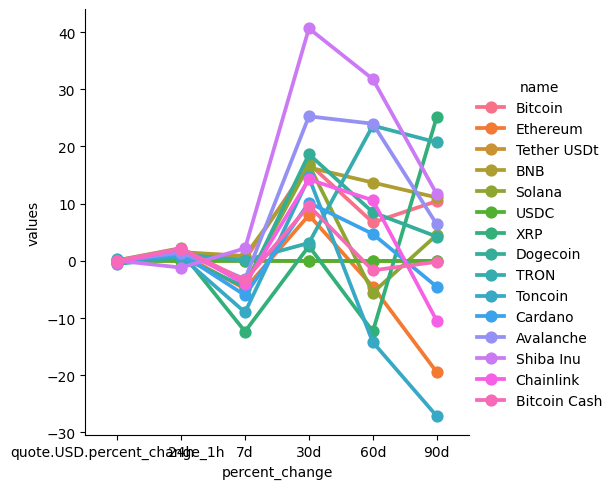

In [39]:
sns.catplot(x ='percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [41]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']] # This will show all colums and rows
df10 = df10.query("name == 'Bitcoin'")            # This query only shows Bitcoins
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63580.60710,2024-10-07 13:34:11.333781
0,Bitcoin,63554.84935,2024-10-07 13:34:32.614439
0,Bitcoin,63554.84935,2024-10-07 13:35:32.742712
0,Bitcoin,63586.75386,2024-10-07 13:36:32.909192
0,Bitcoin,63607.93795,2024-10-07 13:37:33.096672
0,Bitcoin,63622.12352,2024-10-07 13:38:33.260748
0,Bitcoin,63649.26330,2024-10-07 13:39:33.433461
0,Bitcoin,63653.43604,2024-10-07 13:40:33.649895
0,Bitcoin,63653.43604,2024-10-07 13:41:33.824789


C:\Users\dasha\AppData\Local\Temp\ipykernel_37708\548672875.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45);


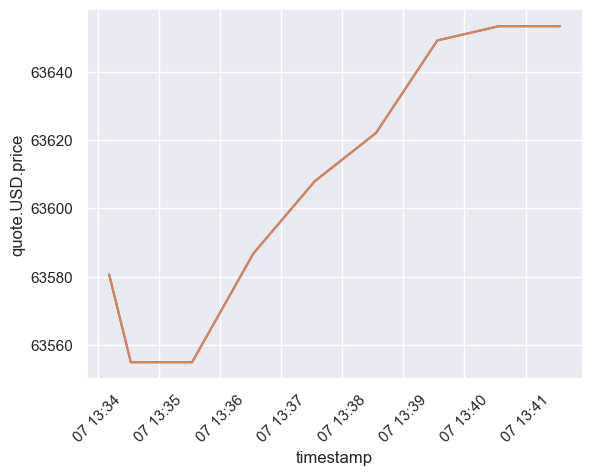

In [43]:
# adds a grid
sns.set_theme(style="darkgrid")
# Cleans up and organizes timestamp axis
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
axes = sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45);

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Create a pivot table to format the data for the heatmap
pivot_df = df3[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']]

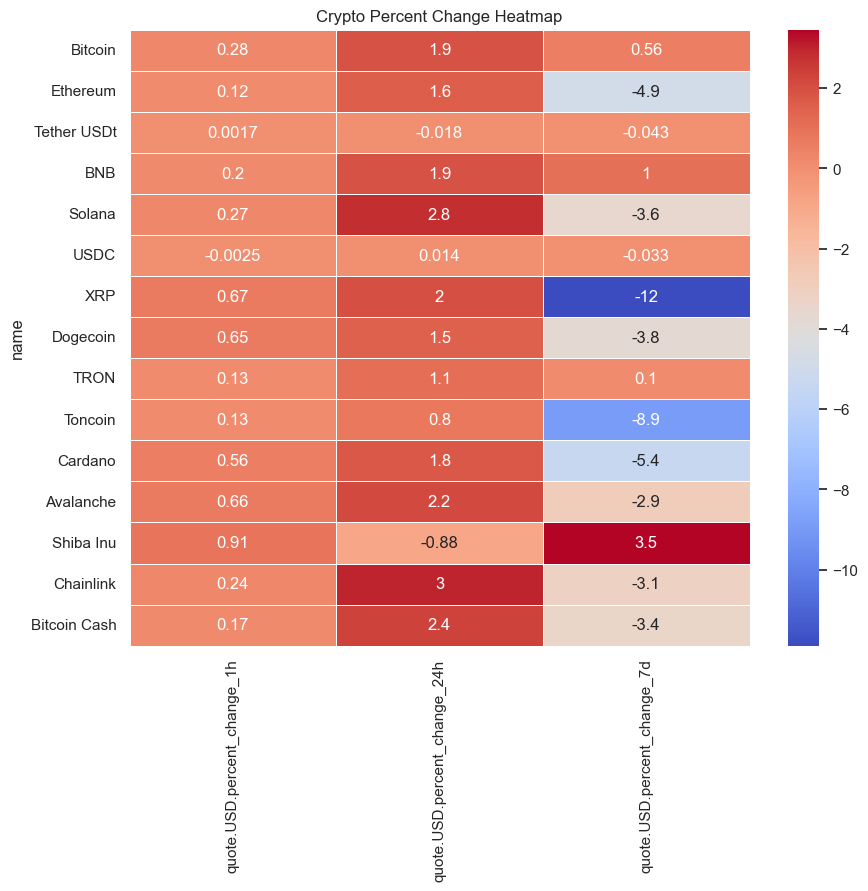

In [63]:
# Plot a heatmap of the percent changes (1h, 24h, 7d)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Crypto Percent Change Heatmap")
plt.show()